<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-load-and-glance" data-toc-modified-id="Data-load-and-glance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data load and glance</a></span></li><li><span><a href="#Understand-data-&amp;-domain" data-toc-modified-id="Understand-data-&amp;-domain-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understand data &amp; domain</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loan-amount" data-toc-modified-id="Loan-amount-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Loan amount</a></span><ul class="toc-item"><li><span><a href="#Default-rate" data-toc-modified-id="Default-rate-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Default rate</a></span></li></ul></li><li><span><a href="#Loan-type" data-toc-modified-id="Loan-type-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Loan type</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Missing data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Drop-miss-cols" data-toc-modified-id="Drop-miss-cols-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Drop miss cols</a></span></li><li><span><a href="#Data-Viz" data-toc-modified-id="Data-Viz-3.1.0.2"><span class="toc-item-num">3.1.0.2&nbsp;&nbsp;</span>Data Viz</a></span></li><li><span><a href="#Other-imputation" data-toc-modified-id="Other-imputation-3.1.0.3"><span class="toc-item-num">3.1.0.3&nbsp;&nbsp;</span>Other imputation</a></span></li></ul></li></ul></li><li><span><a href="#Outlier-treatment" data-toc-modified-id="Outlier-treatment-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier treatment</a></span></li><li><span><a href="#OneHot-encoding" data-toc-modified-id="OneHot-encoding-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>OneHot encoding</a></span></li><li><span><a href="#Pipeline-for-missing-data" data-toc-modified-id="Pipeline-for-missing-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pipeline for missing data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Test-train-split" data-toc-modified-id="Test-train-split-3.4.0.1"><span class="toc-item-num">3.4.0.1&nbsp;&nbsp;</span>Test train split</a></span></li></ul></li></ul></li><li><span><a href="#Association" data-toc-modified-id="Association-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Association</a></span><ul class="toc-item"><li><span><a href="#Graphical" data-toc-modified-id="Graphical-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Graphical</a></span></li><li><span><a href="#Statistical" data-toc-modified-id="Statistical-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Statistical</a></span><ul class="toc-item"><li><span><a href="#Pearson-correlation" data-toc-modified-id="Pearson-correlation-3.5.2.1"><span class="toc-item-num">3.5.2.1&nbsp;&nbsp;</span>Pearson correlation</a></span></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-3.5.2.2"><span class="toc-item-num">3.5.2.2&nbsp;&nbsp;</span>Hypothesis testing</a></span></li><li><span><a href="#Mutual-information" data-toc-modified-id="Mutual-information-3.5.2.3"><span class="toc-item-num">3.5.2.3&nbsp;&nbsp;</span>Mutual information</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XGboost</a></span></li></ul></li></ul></div>

# Data load and glance

In [1018]:
import os
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 150)

In [474]:

os.chdir('/Users/shivadarul/Desktop/Data Science/Kaggle/Home Loan')
os.listdir('home-credit-default-risk')

['application_test.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'HomeCredit_columns_description.xls',
 'bureau_balance.csv',
 'application_train.xlsx',
 'sample_submission.csv']

In [475]:
with open("home-credit-default-risk/HomeCredit_columns_description.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [476]:
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')

In [109]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [61]:
application_train.groupby(['NAME_CONTRACT_TYPE','TARGET']).TARGET.count() / application_train.shape[0]

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         0.829274
                    1         0.075513
Revolving loans     0         0.089997
                    1         0.005216
Name: TARGET, dtype: float64

In [81]:
cat_cols = pd.Series(application_train.select_dtypes(include = 'object').columns)

Sample for excel EDA

In [377]:
sample.to_csv('sample_application_train.csv')

# Understand data & domain

Data is at a loand ID level (primary dataset)

In [479]:
df = application_train

In [123]:
len(application_train['SK_ID_CURR'].unique()) == application_train.shape[0]

True

In [130]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Loan amount

<AxesSubplot:ylabel='AMT_CREDIT'>

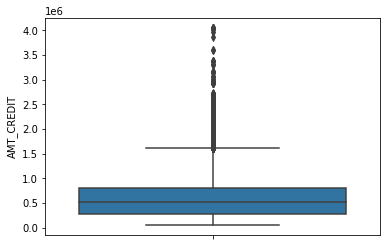

In [135]:
sns.boxplot(y = df.AMT_CREDIT)

In [138]:
df[df.AMT_CREDIT==0].shape, df.AMT_CREDIT.isnull().sum()

((0, 122), 0)

In [177]:
df['Loan_amount_cat'] = np.select(
    [
        df['AMT_CREDIT'].between(0, 200000, inclusive=False),
        df['AMT_CREDIT'].between(200000, 500000, inclusive=True),
        df['AMT_CREDIT'].between(500000, 900000, inclusive=True)
    ], 
    [
        'Small',
        'Medium',
        'High'
    ], 
    default='Large Loans'
)

<AxesSubplot:xlabel='Loan_amount_cat'>

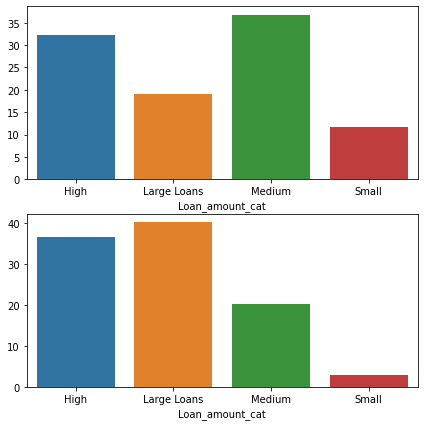

In [179]:
split_by_amt = df.groupby('Loan_amount_cat').TARGET.count()*100 / df.shape[0]
split_by_amt2 = df.groupby('Loan_amount_cat').AMT_CREDIT.sum()*100 / df.AMT_CREDIT.sum()

fig = plt.figure(figsize = (7,7))

fig.add_subplot(2,1,1)
sns.barplot(x = split_by_amt.index, y = split_by_amt.values )

fig.add_subplot(2,1,2)
sns.barplot(x = split_by_amt2.index, y = split_by_amt2.values )

#### Default rate

In [205]:
overall_default_rate = df[df.TARGET == 1].SK_ID_CURR.count()/df.SK_ID_CURR.count()
overall_default_rate*100

overall_default_rate2 = df[df.TARGET == 1].AMT_CREDIT.sum()/df.AMT_CREDIT.sum()
overall_default_rate2*100

7.517002948053973

In [211]:
default_rate = df[df.TARGET == 1].groupby('Loan_amount_cat').SK_ID_CURR.count()*100/df.groupby('Loan_amount_cat').SK_ID_CURR.count()
default_rate

default_rate2 = df[df.TARGET == 1].groupby('Loan_amount_cat').AMT_CREDIT.sum()*100/df.groupby('Loan_amount_cat').AMT_CREDIT.sum()
default_rate, default_rate2

(Loan_amount_cat
 High           8.704894
 Large Loans    6.075163
 Medium         8.936381
 Small          6.889110
 Name: SK_ID_CURR, dtype: float64,
 Loan_amount_cat
 High           8.471089
 Large Loans    5.840107
 Medium         9.162193
 Small          7.155997
 Name: AMT_CREDIT, dtype: float64)

Micro Loan repayment is higher than Medium and Large loans.

Larger loans are more trustabe in this bank

([<matplotlib.patches.Wedge at 0x7fb527ab5100>,
 [Text(0.2967890730626778, 1.0592054787011804, 'High'),
  Text(-0.9975276071504925, -0.4636147894239495, 'Large Loans'),
  Text(0.6433416146643874, -0.8922508430038152, 'Medium'),
  Text(1.0961624560157575, -0.09180343142553408, 'Small')])

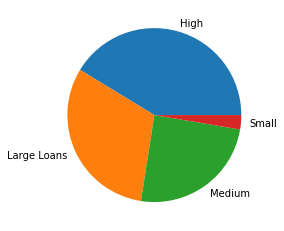

In [235]:
df_temp = df[df.TARGET==1].groupby('Loan_amount_cat').AMT_CREDIT.sum()
plt.pie(x = df_temp.values, labels = df_temp.index)

### Loan type

Most loans are cash loans and cash loands have a significantly higher default rate

In [233]:
df.NAME_CONTRACT_TYPE.value_counts() / df.shape[0]


Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [234]:
default_rate = df[df.TARGET == 1].groupby('NAME_CONTRACT_TYPE').SK_ID_CURR.count()*100/df.groupby('NAME_CONTRACT_TYPE').SK_ID_CURR.count()
default_rate

default_rate2 = df[df.TARGET == 1].groupby('NAME_CONTRACT_TYPE').AMT_CREDIT.sum()*100/df.groupby('NAME_CONTRACT_TYPE').AMT_CREDIT.sum()
default_rate, default_rate2

(NAME_CONTRACT_TYPE
 Cash loans         8.345913
 Revolving loans    5.478329
 Name: SK_ID_CURR, dtype: float64,
 NAME_CONTRACT_TYPE
 Cash loans         7.689806
 Revolving loans    4.334493
 Name: AMT_CREDIT, dtype: float64)

# EDA

## Missing data

In [477]:
df.shape

(307511, 122)

#### Drop miss cols

In [480]:
missing = df.isnull().sum()
missing2 = missing[missing.values > 0].sort_values(ascending = False)/df.shape[0]

cols_miss_40 = missing2[missing2.values > 0.4].index

In [481]:
df2 = df.drop(columns = cols_miss_40)

df2.pop('SK_ID_CURR')
y = df2.pop('TARGET')
df2.shape

(307511, 71)

In [482]:
cols_miss = missing2[missing2.values <= 0.4]
df2[cols_miss.index].dtypes.sort_values()

DAYS_LAST_PHONE_CHANGE        float64
EXT_SOURCE_3                  float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
CNT_FAM_MEMBERS               float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
EXT_SOURCE_2                  float64
AMT_GOODS_PRICE               float64
AMT_ANNUITY                   float64
OCCUPATION_TYPE                object
NAME_TYPE_SUITE                object
dtype: object

#### Data Viz

AMT_ANNUITY


/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AMT_GOODS_PRICE
CNT_FAM_MEMBERS
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE


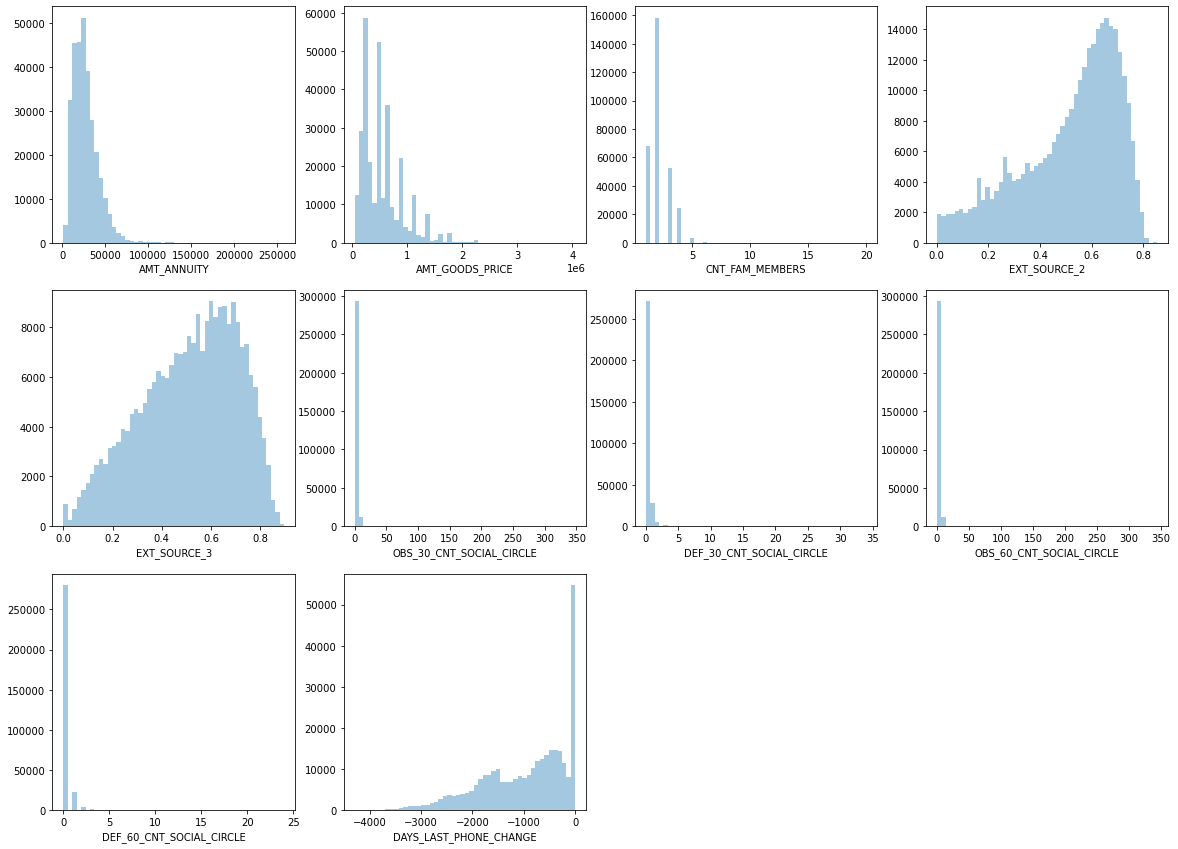

In [465]:
fig = plt.figure(figsize = (20,20))


pos = 1
for i in df2[cols_miss.index].select_dtypes(exclude = 'object'):
        fig.add_subplot(4,4,pos)
        print(i)
        sns.distplot( df2[i], kde = False)
        pos+=1


In [466]:
df2.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-15

In [483]:
## 99% of non null values from these columns are 0's so dropping

df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_DAY.isnull()].shape[0]
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_QRT.isnull()].shape[0]
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()].shape[0]
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()].shape[0]
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()].shape[0]
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()*100/df[~df2.AMT_REQ_CREDIT_BUREAU_MON.isnull()].shape[0]

cols_miss_0s = ['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON']

df2.drop(columns = cols_miss_0s, inplace = True)


In [485]:
cols_miss.index

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'NAME_TYPE_SUITE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [488]:
df2.shape

(307511, 65)

In [489]:
cols_miss = df2.isnull().sum()
cols_miss = cols_miss[cols_miss.values > 0]
cols_miss.sort_values()

DAYS_LAST_PHONE_CHANGE          1
CNT_FAM_MEMBERS                 2
AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
EXT_SOURCE_2                  660
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
NAME_TYPE_SUITE              1292
EXT_SOURCE_3                60965
OCCUPATION_TYPE             96391
dtype: int64

#### Other imputation

In [490]:
all_cols = df2.columns

In [491]:
## Null values have a lower default rate than other categories, so going to impute them with 'other'

impute_other_cols = ['OCCUPATION_TYPE','NAME_TYPE_SUITE']
df[(df.TARGET == 1)&(df.OCCUPATION_TYPE.isnull())].SK_ID_CURR.count()*100/df[df.OCCUPATION_TYPE.isnull()].SK_ID_CURR.count(),df[(df.TARGET == 1)&(df.NAME_TYPE_SUITE.isnull())].SK_ID_CURR.count()*100/df[df.NAME_TYPE_SUITE.isnull()].SK_ID_CURR.count()


(6.5130561981927775, 5.41795665634675)

In [492]:
## zero imputing for the following cols (most make obvious sense), assuming no fam_members for miss data

df2.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()/df[~df.DEF_30_CNT_SOCIAL_CIRCLE.isnull()].shape[0]

zero_impute_cols = ['DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS']

In [493]:
## Rest of miss columns median imputed looking at distribution
median_impute_cols = [i for i in cols_miss.index if (i not in impute_other_cols)&(i not in zero_impute_cols)]

## tagging cols with no missing values 
non_miss_cols = [i for i in all_cols if (i not in zero_impute_cols)&(i not in impute_other_cols)&(i not in median_impute_cols)]

len(non_miss_cols) + len(impute_other_cols) + len(zero_impute_cols) + len(median_impute_cols)

65

## Outlier treatment

Days employed is the only variable with obvious outlier which needs to be treated

since this is a large positive value compared to the normal -ve values, might be ok leaving it for now

Seems like a significant variable, lets see if it pops up in the model

In [578]:
df2.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.00000

In [577]:

for i in num_cols:
    if( 4*df[i].quantile(0.99) < df[i].max() ):
        print(i)
    

CNT_CHILDREN
AMT_INCOME_TOTAL
DAYS_BIRTH
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


<AxesSubplot:xlabel='TARGET', ylabel='DAYS_EMPLOYED'>

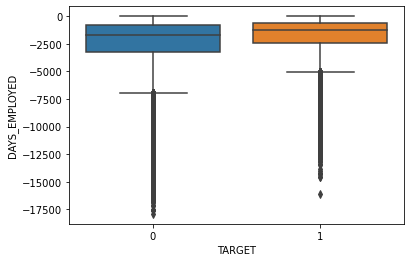

In [584]:
sns.boxplot(y = 'DAYS_EMPLOYED', x = 'TARGET', data = df[df.DAYS_EMPLOYED <=0])

In [ ]:
df2.DAYS_EMPLOYED[df2.df2.DAYS_EMPLOYED >0] = df2.

## OneHot encoding

In [ ]:
encoder.get_feature_names(['Sex', 'AgeGroup'])

In [676]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

In [679]:
onehot = OneHotEncoder(handle_unknown = 'ignore' , sparse= False)

In [686]:
cat_cols.values

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

In [690]:
cat_cols2 = pd.Series(df2.select_dtypes(include = 'object').columns)

It is better to target encode organization type and occupation type cause of their size. One hot encoded ones might  have too many variables causing issue for optimization algos. For now oneHot

In [703]:
df2[cat_cols2].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

## Pipeline for missing data

In [822]:
non_miss_non_cat_cols = [i for i in non_miss_cols if i not in cat_cols2.values]

43

In [831]:
other_imputer = SimpleImputer(strategy = 'constant', fill_value = 'other')
zero_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
median_imputer = SimpleImputer(strategy = 'median', fill_value = 'other')

onehot = OneHotEncoder(handle_unknown = 'ignore' , sparse= False)
cat_process = Pipeline(steps = [('cat_other_impute',other_imputer), ('onehot',onehot) ])



In [832]:
preprocess = ColumnTransformer(transformers = 
                               [('cat_process',cat_process, cat_cols2),
                                ('mean_impute',zero_imputer, zero_impute_cols),
                                ('median_impute',median_imputer, median_impute_cols),
                                ('zero_impute',zero_imputer, non_miss_non_cat_cols),
                              
                              ])

In [833]:
preprocess.fit(df2)

ColumnTransformer(transformers=[('cat_process',
                                 Pipeline(steps=[('cat_other_impute',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 0             NAME_CONTRACT_TYPE
1                    CODE_GENDER
2                   FLAG_OWN_CAR
3                FLAG_OWN_REALTY
4                NAME_TYPE_SUITE
5               NAME_INCOME_TYPE
6            NAME_EDUCATION_TYPE
7             NAME_FAMILY_STATUS
8              NAME_HOUSING_T...
                                  'REGION_RATING_CLIENT_W_CITY',
                                  'HOUR_APPR_PROCESS_START',
                        

#### Test train split

In [985]:
X_train, X_valid, y_train, y_valid = train_test_split(df2, y)

In [986]:
X_train.shape

(230633, 65)

In [987]:
preprocess.fit(X_train)

ColumnTransformer(transformers=[('cat_process',
                                 Pipeline(steps=[('cat_other_impute',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 0             NAME_CONTRACT_TYPE
1                    CODE_GENDER
2                   FLAG_OWN_CAR
3                FLAG_OWN_REALTY
4                NAME_TYPE_SUITE
5               NAME_INCOME_TYPE
6            NAME_EDUCATION_TYPE
7             NAME_FAMILY_STATUS
8              NAME_HOUSING_T...
                                  'REGION_RATING_CLIENT_W_CITY',
                                  'HOUR_APPR_PROCESS_START',
                        

In [989]:
X_train2 = pd.DataFrame(preprocess.transform(X_train))
X_valid2 = pd.DataFrame(preprocess.transform(X_valid))

In [990]:
## when fitted via pipeline the onehot does not get fitted for some reason (they dup the transformers apparently - stack)
## This will cause the onehot tonot be able to provide get_feature_names
## So we are fitting again seperately to avail that feature

x = pd.DataFrame(cat_process.fit_transform(X_train[cat_cols2]))

onehot.get_feature_names(cat_cols.values)
cat_column_names = onehot.get_feature_names(cat_cols.values)

In [1034]:
column_names = pd.concat([pd.Series(cat_column_names), pd.Series(zero_impute_cols), pd.Series(median_impute_cols), pd.Series(non_miss_non_cat_cols)])
len(column_names)

179

In [1070]:
X_train2.columns = column_names
X_valid2.columns = column_names

In [1069]:
X_valid2.shape, X_train2.shape

((76878, 179), (230633, 179))

## Association

### Graphical

Notes:

Annual income median value seems to show a difference. Data is highly skewed, with potential outliers

Ex_source2 and EX_source3 are the only clear differentiators in cont_cols

In [508]:
df2.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [620]:
cont_cols = df2.select_dtypes(include = 'float').columns
num_cols = df2.select_dtypes(exclude = 'object').columns
flag_cols = int_cols[int_cols.str.find('FLAG') >= 0]
int_cols = [i for i in df2.select_dtypes(include = 'int').columns if i not in flag_cols]

In [524]:
df2.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.00000

/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: num must be 1 <= num <= 50, not 51

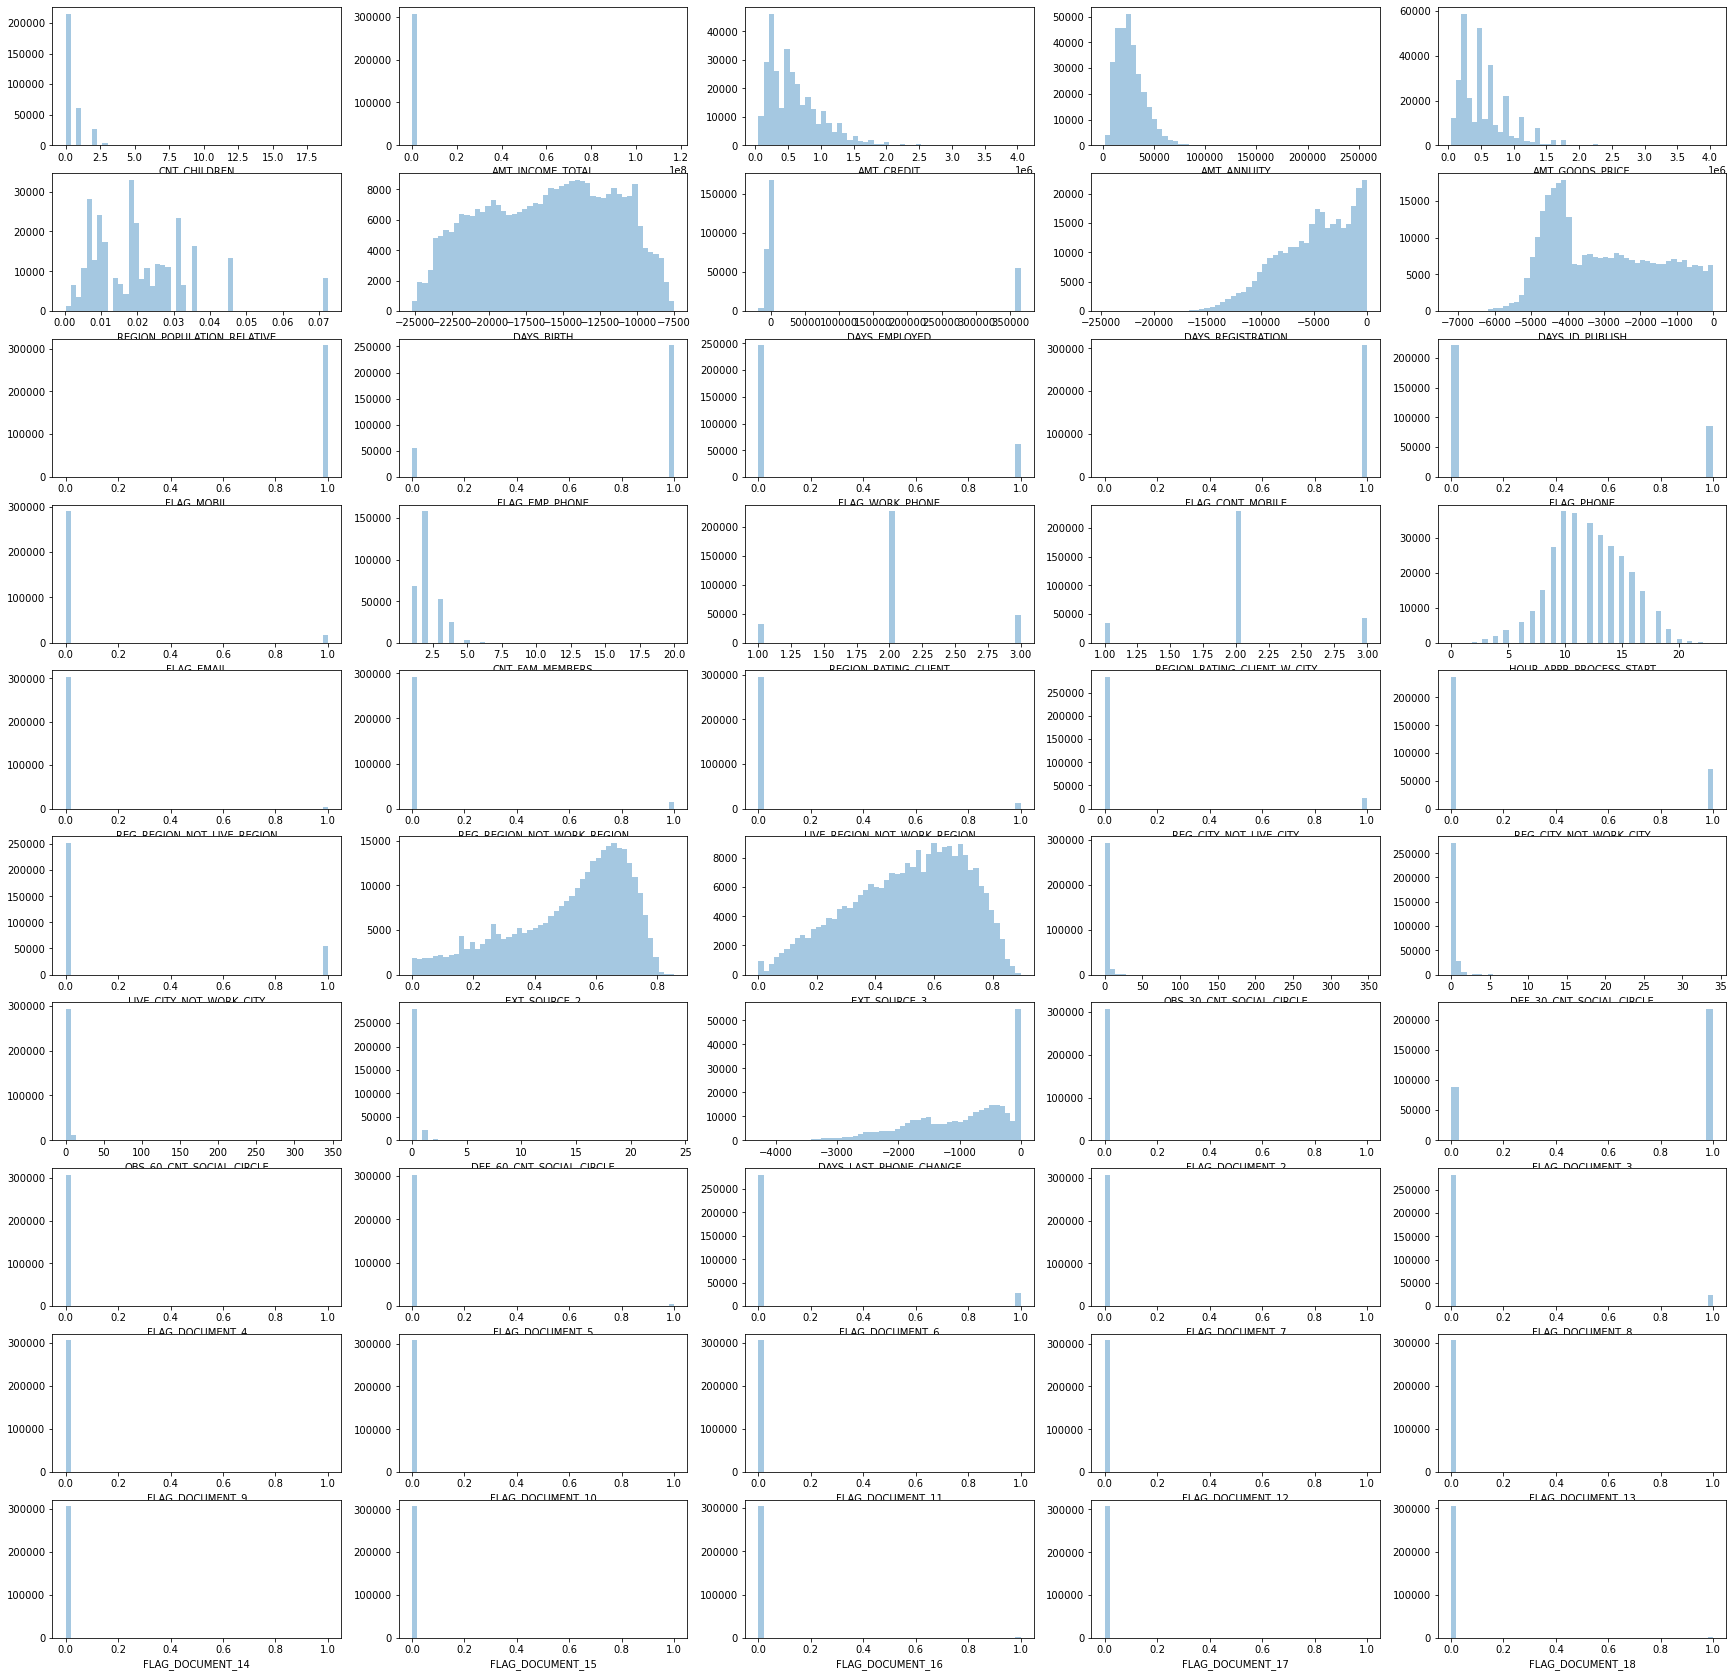

In [622]:
fig = plt.figure(figsize = (30,30))

pos = 1

for i in num_cols:
    fig.add_subplot(10,5,pos)
    sns.distplot(df2[i], kde= False)
    pos+=1
    

In [ ]:
fig = plt.figure(figsize = (25,25))

pos = 1

for i in cont_cols:
    fig.add_subplot(4,4,pos)
    sns.boxplot(y = df2[i], x = y)
    pos+=1
    

In [ ]:
fig = plt.figure(figsize = (40,40))

pos = 1

for i in int_cols:
    fig.add_subplot(10,4,pos)
    sns.boxplot(y = df2[i], x = y)
    pos+=1
    

### Statistical

#### Pearson correlation

In [ ]:
# There are some variables which are obviously correlated like:
# 1. amont credit, amount annuity
# 2. OBS_CNT_variables


corr = df[pd.Series(cont_cols).append(pd.Series(['TARGET']))].corr()

fig = plt.figure(figsize = (20,20))

sns.heatmap(abs(corr), annot = True)

In [618]:
flag_cols = int_cols[int_cols.str.find('FLAG') >= 0]

Why so trash all you variables?

<AxesSubplot:>

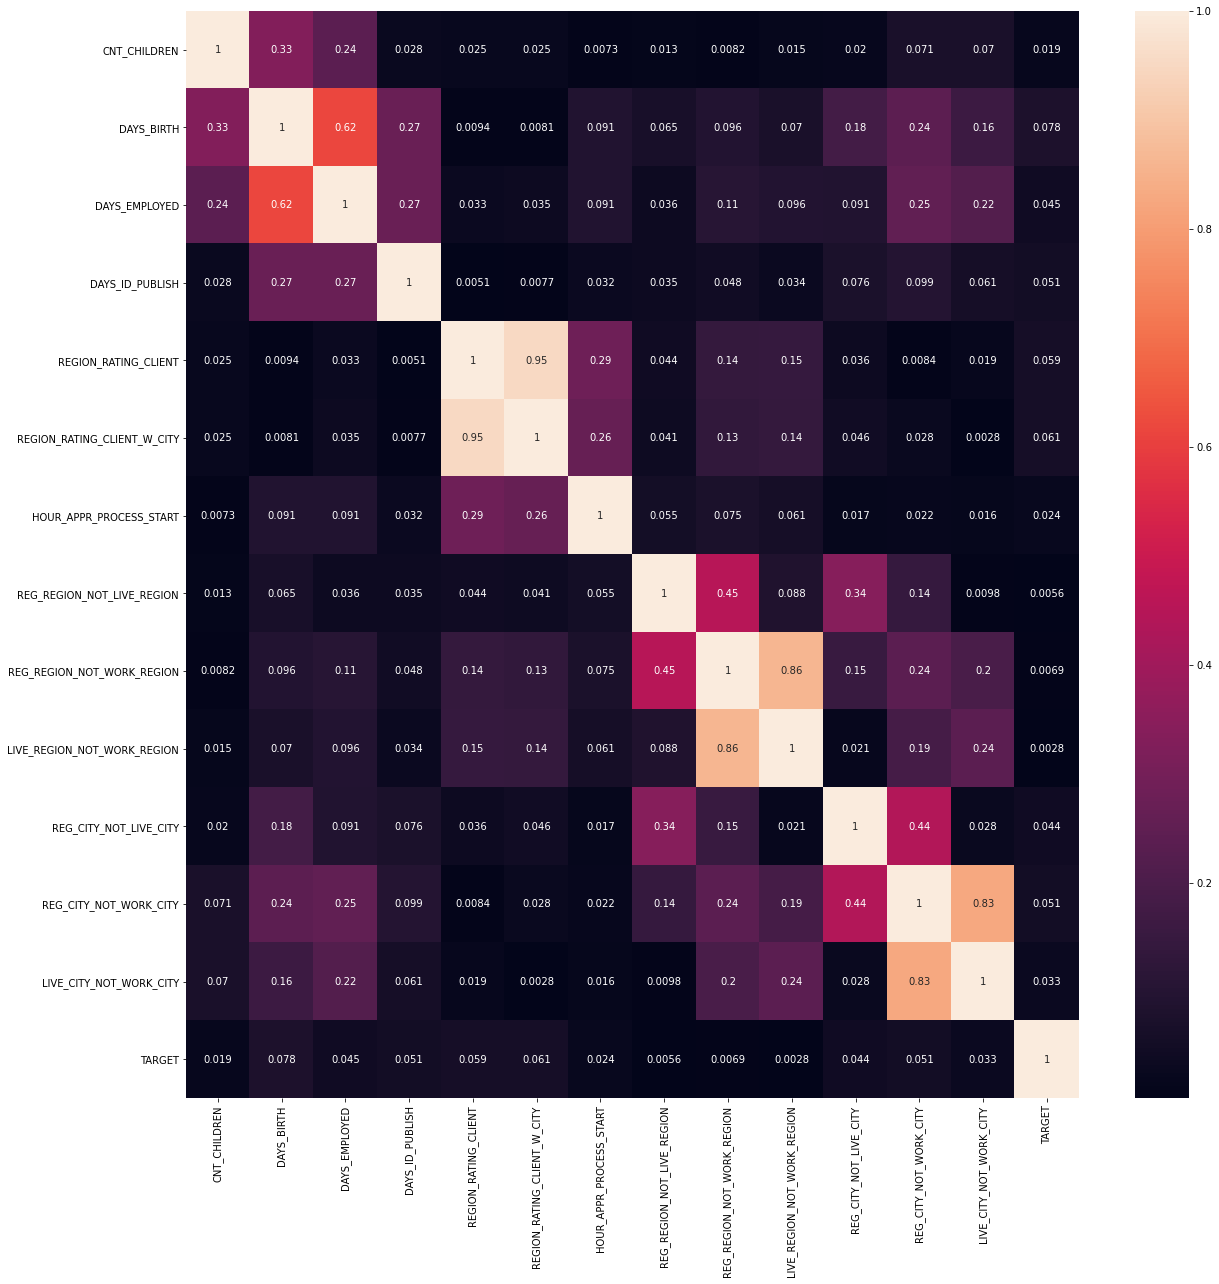

In [619]:
# There are some variables which are obviously correlated like:
# 1. amont credit, amount annuity
# 2. OBS_CNT_variables


corr = df[pd.Series(int_cols).append(pd.Series(['TARGET']))].corr()

fig = plt.figure(figsize = (20,20))

sns.heatmap(abs(corr), annot = True)

#### Hypothesis testing

I feel the t-test and chi square only tell if the means are significantly different. 

Not sure how much they will actually contribute to the predictive power of the model

Annova i feel is better this way, cause it talks about varaince the model/variable can explain

How do these compare to mutual information?

In [633]:
df.groupby('TARGET').DAYS_REGISTRATION.mean()

TARGET
0   -5029.941065
1   -4487.127009
Name: DAYS_REGISTRATION, dtype: float64

In [635]:


#Statsiticaly significant difference

for i in int_cols:
    print(i," ",ttest_ind(df.loc[df.TARGET ==1,i],df.loc[df.TARGET ==0,i], nan_policy = 'omit').pvalue)

CNT_CHILDREN   1.9224915502038074e-26
DAYS_BIRTH   0.0
DAYS_EMPLOYED   3.631173082885303e-137
DAYS_ID_PUBLISH   2.527523814365037e-179
REGION_RATING_CLIENT   2.1724334940603463e-234
REGION_RATING_CLIENT_W_CITY   2.078455155384858e-250
HOUR_APPR_PROCESS_START   5.82682352888698e-41
REG_REGION_NOT_LIVE_REGION   0.0019876089466520012
REG_REGION_NOT_WORK_REGION   0.00011832365784321195
LIVE_REGION_NOT_WORK_REGION   0.11793466970817382
REG_CITY_NOT_LIVE_CITY   5.894986357180635e-134
REG_CITY_NOT_WORK_CITY   3.805463337349456e-176
LIVE_CITY_NOT_WORK_CITY   9.925670067863496e-73


In [655]:

for i in cat_cols:
    contingency = pd.crosstab(df[i], df.TARGET)
    print(i," ",chi2_contingency(contingency)[1])

NAME_CONTRACT_TYPE   1.0235150721172847e-65
CODE_GENDER   1.1290217848908289e-200
FLAG_OWN_CAR   9.330994431109667e-34
FLAG_OWN_REALTY   0.0006681470317545887
NAME_TYPE_SUITE   1.1329313903575907e-05
NAME_INCOME_TYPE   1.9281456056861122e-266
NAME_EDUCATION_TYPE   2.4476812052198174e-219
NAME_FAMILY_STATUS   7.744841561414037e-107
NAME_HOUSING_TYPE   1.0990890032617707e-88
OCCUPATION_TYPE   3.7844998567642684e-288
WEEKDAY_APPR_PROCESS_START   0.01744736931389504
ORGANIZATION_TYPE   5.224541090300172e-299
FONDKAPREMONT_MODE   0.0007732982001133781
HOUSETYPE_MODE   9.992328040454538e-07
WALLSMATERIAL_MODE   1.4531802848120748e-27
EMERGENCYSTATE_MODE   1.1386802431747463e-06


In [654]:
for i in flag_cols:
    contingency = pd.crosstab(df[i], df.TARGET)
    print(i," ",chi2_contingency(contingency)[1])

FLAG_MOBIL   0.12378615154489829
FLAG_EMP_PHONE   2.5306059279614537e-143
FLAG_WORK_PHONE   2.6758000919452704e-56
FLAG_CONT_MOBILE   0.8976989816319643
FLAG_PHONE   9.489418049556951e-40
FLAG_EMAIL   0.3366632895181666
FLAG_DOCUMENT_2   0.012597746385457218
FLAG_DOCUMENT_3   1.8557477135709125e-133
FLAG_DOCUMENT_4   0.2649917939107048
FLAG_DOCUMENT_5   0.8823563514069667
FLAG_DOCUMENT_6   1.425605347566481e-56
FLAG_DOCUMENT_7   0.5460783940196792
FLAG_DOCUMENT_8   8.724696176376265e-06
FLAG_DOCUMENT_9   0.0182533270011425
FLAG_DOCUMENT_10   0.9280282269633106
FLAG_DOCUMENT_11   0.02188786168173307
FLAG_DOCUMENT_12   0.3795390674134992
FLAG_DOCUMENT_13   1.921626387971088e-10
FLAG_DOCUMENT_14   2.138597509727043e-07
FLAG_DOCUMENT_15   0.00041706549210387414
FLAG_DOCUMENT_16   1.4804321259373877e-10
FLAG_DOCUMENT_17   0.09486562522282957
FLAG_DOCUMENT_18   1.2253312611830229e-05
FLAG_DOCUMENT_19   0.5371847664073595
FLAG_DOCUMENT_20   0.9780255911989449
FLAG_DOCUMENT_21   0.060697873178

#### Mutual information

In [855]:
dtypes =  df3.dtypes
discrete_cols = dtypes.values == 'object' 
discrete_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [893]:
mi_scores = mutual_info_regression(df3[1:50000], y[1:50000], discrete_features = discrete_cols, random_state= 0)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

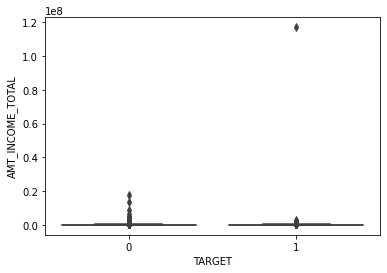

In [940]:
sns.boxplot(y = df3.AMT_INCOME_TOTAL, x = y)

In [894]:
mi_scores2 = pd.DataFrame(mi_scores, index = df3.columns, columns = ['mi_scores'])

mi_scores2 = mi_scores2.reset_index()

mi_scores2.sort_values(by = 'mi_scores', ascending = False)

,index,mi_scores
135,EXT_SOURCE_3,0.016042
134,EXT_SOURCE_2,0.011997
38,NAME_HOUSING_TYPE_Municipal apartment,0.011734
132,AMT_ANNUITY,0.011670
91,ORGANIZATION_TYPE_Industry: type 6,0.011230
51,OCCUPATION_TYPE_Low-skill Laborers,0.008902
155,LIVE_REGION_NOT_WORK_REGION,0.008815
29,NAME_EDUCATION_TYPE_Secondary / secondary special,0.008395
74,ORGANIZATION_TYPE_Cleaning,0.007461
79,ORGANIZATION_TYPE_Government,0.006783


In [897]:
mi_scores2.shape

(179, 2)

<AxesSubplot:xlabel='mi_scores', ylabel='index'>

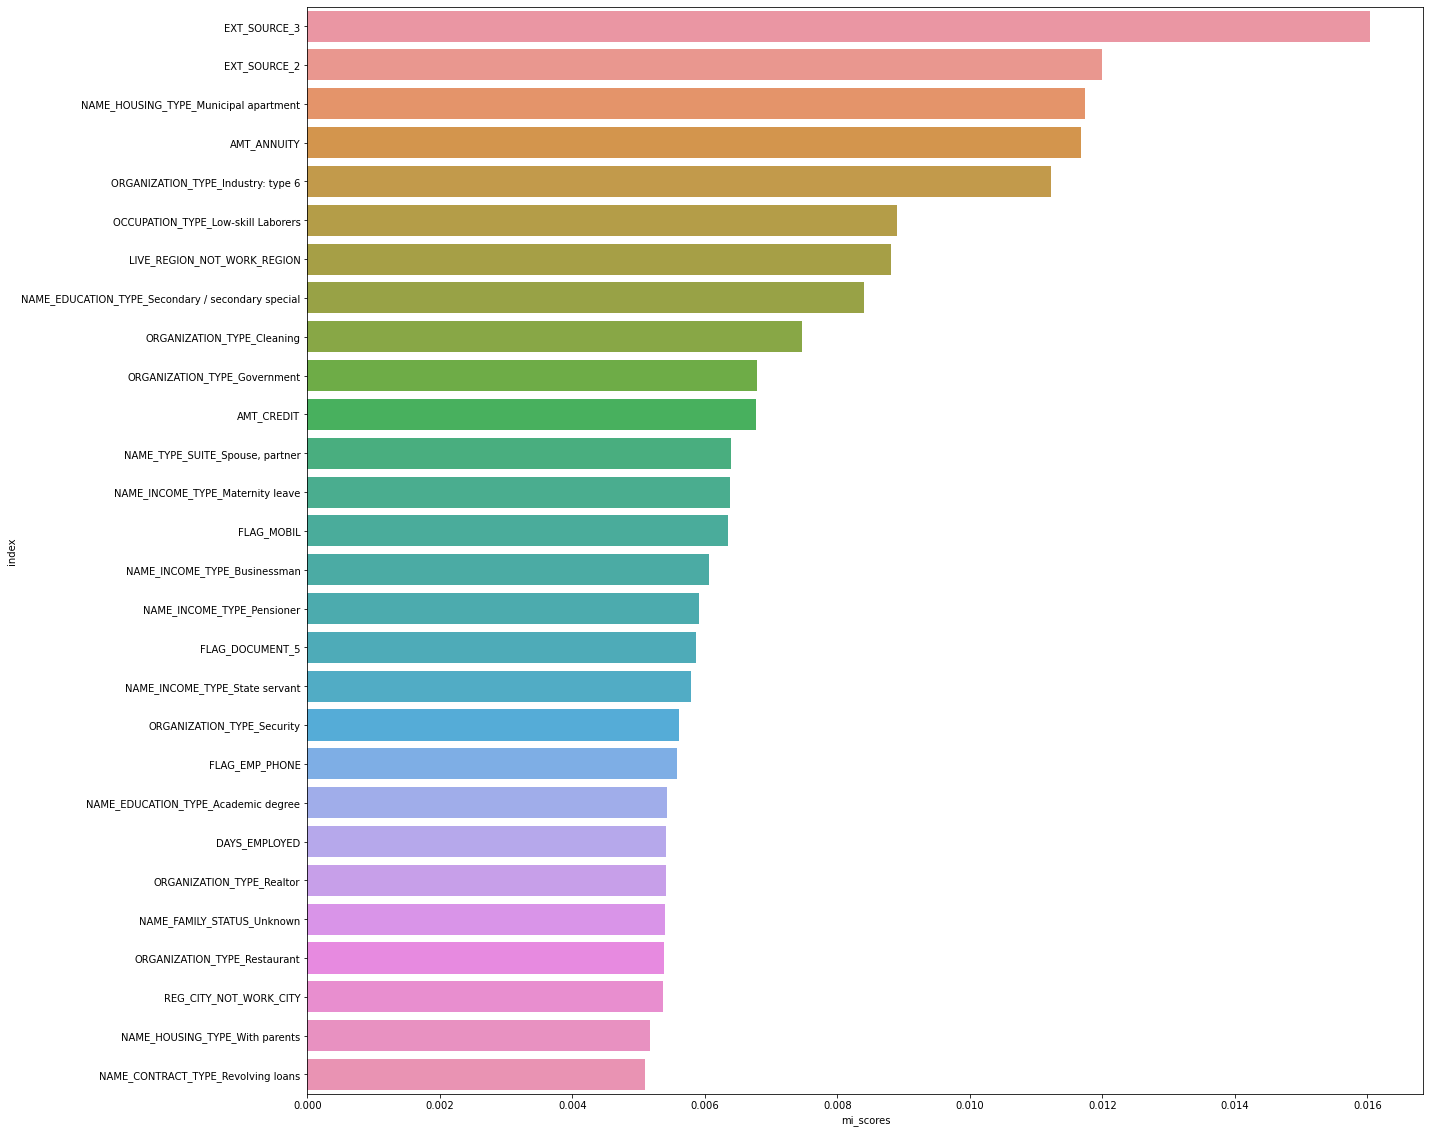

In [898]:
fig = plt.figure(figsize = (20,20))

sns.barplot(x = 'mi_scores', y = 'index', data = mi_scores2[mi_scores2.mi_scores > 0.005].sort_values(by = 'mi_scores', ascending = False))

# Modeling

## Random forest

In [1057]:
rfmodel = RandomForestClassifier(random_state = 0,n_estimators = 20,   max_depth= 5, n_jobs = -1)

In [1054]:
rfmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 200,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [1058]:
rfmodel.fit(X_train2,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1, random_state=0)

In [1059]:
pd.Series(rfmodel.predict(X_valid2)).value_counts()

0    76878
dtype: int64

In [1023]:
def class_scores(model):
    print('precision : ', precision_score(y_valid,model.predict(X_valid2))*100)
    print('recall : ' ,recall_score(y_valid,model.predict(X_valid2))*100)
    print('roc_auc_score : ' ,roc_auc_score(y_valid,model.predict(X_valid2))*100)
    print('f1 score : ' ,f1_score(y_valid,model.predict(X_valid2))*100)
    print('accuracy : ' ,model.score(X_valid2,y_valid)*100)


In [1024]:
class_scores(rfmodel)

/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision :  0.0
recall :  0.0
roc_auc_score :  50.0
f1 score :  0.0
accuracy :  91.9443794063321


In [1049]:
imp_df2.index

RangeIndex(start=0, stop=19, step=1)

In [1051]:
def feature_importance(model):
    imp_df = pd.DataFrame(model.feature_importances_, index = X_train2.columns, columns = ['imp_score']).sort_values(by = 'imp_score', ascending = False )
    imp_df2 = imp_df[1:20].reset_index()

    fig = plt.figure(figsize = (20,20))
    sns.barplot( x = imp_df2.imp_score, y = imp_df2['index'])

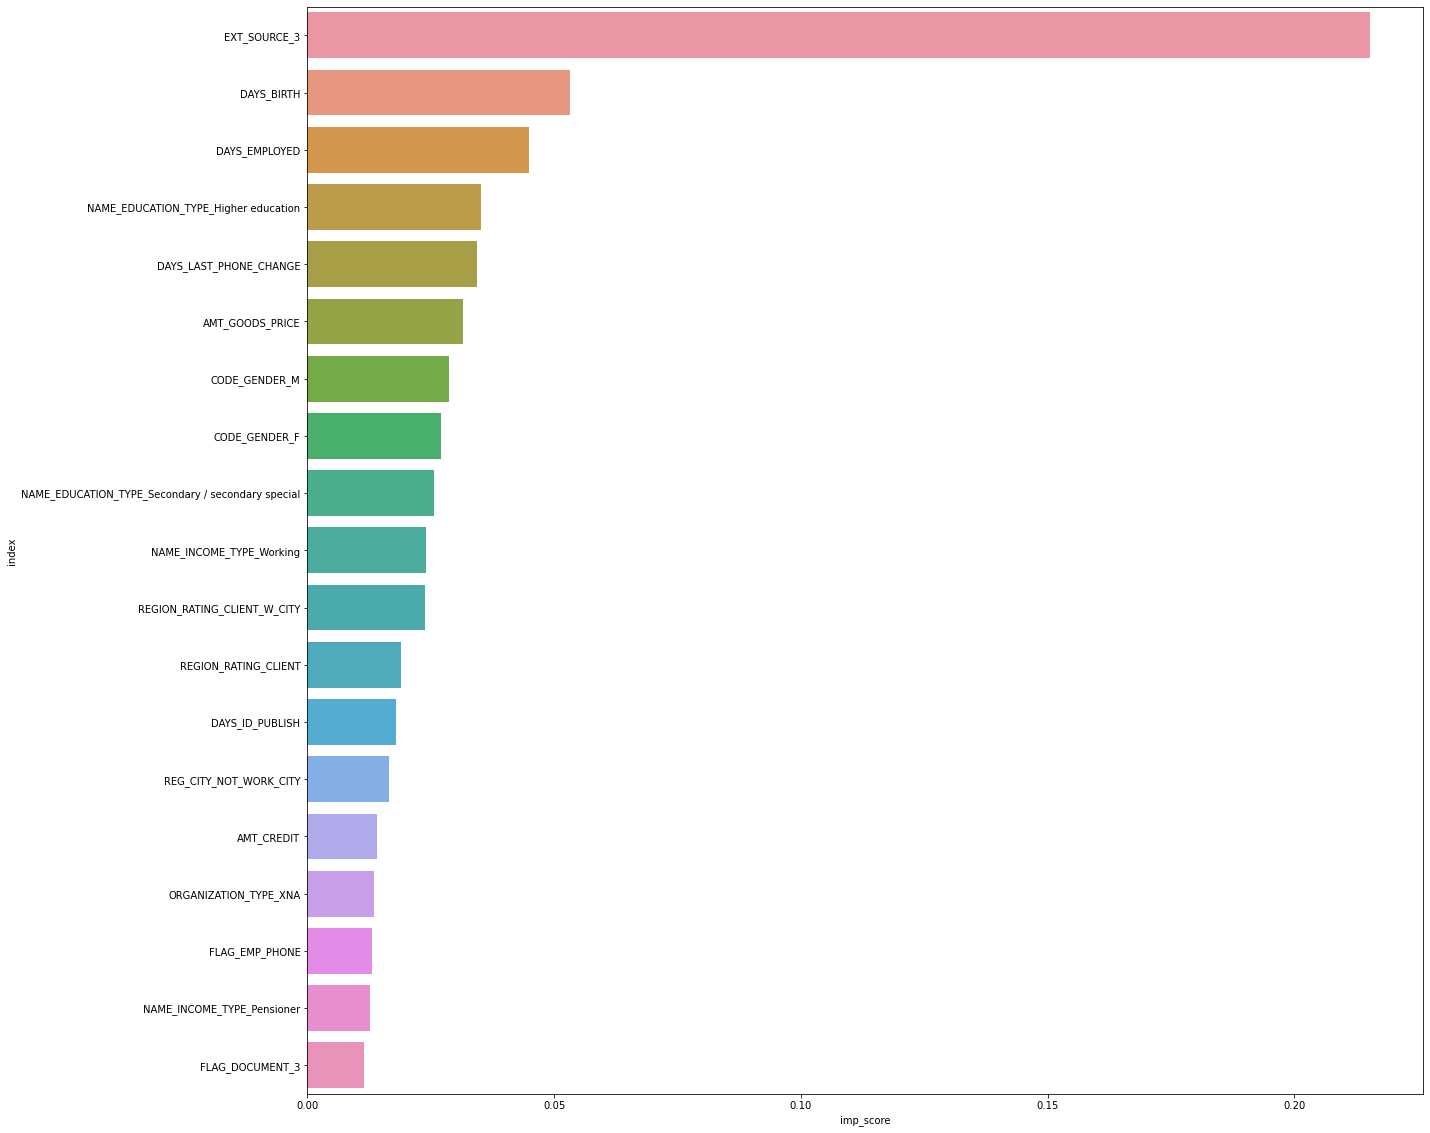

In [1052]:
feature_importance(rfmodel)

## Decision Tree

In [963]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [992]:
dtreemodel = DecisionTreeClassifier(random_state = 0, max_depth = 7)

dtreemodel.fit(X_train2,y_train)

pd.Series(dtreemodel.predict(X_valid2)).value_counts()

In [ ]:
print('accuracy : ' ,dtreemodel.score(y_valid,dtreemodel.predict(X_valid2))*100)

In [1017]:
print('precision : ', precision_score(y_valid,dtreemodel.predict(X_valid2))*100)
print('recall : ' ,recall_score(y_valid,dtreemodel.predict(X_valid2))*100)
print('roc_auc_score : ' ,roc_auc_score(y_valid,dtreemodel.predict(X_valid2))*100)
print('f1 score : ' ,f1_score(y_valid,dtreemodel.predict(X_valid2))*100)
print('accuracy : ' ,dtreemodel.score(X_valid2,y_valid)*100)




precision :  44.52054794520548
recall :  1.0495720975294687
roc_auc_score :  50.46748959265665
f1 score :  2.0507966556239157
accuracy :  91.92356721038529


In [967]:
confusion_matrix(dtreemodel.predict(df3), y)

array([[282518,  24522],
       [   168,    303]])

In [1010]:
y_pred = dtreemodel.predict(X_valid2)

In [1015]:
pd.Series(y_valid).value_counts()

0    70685
1     6193
Name: TARGET, dtype: int64

0.9192356721038528

## XGboost

In [1061]:
from xgboost import XGBClassifier

In [1079]:
xgbmodel = XGBClassifier(random_state = 0, n_jobs = -1,  early_stopping_rounds= 5)
xgbmodel.fit(X_train2,y_train)
pd.Series(xgbmodel.predict(X_valid2)).value_counts()


/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:12:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0    76476
1      402
dtype: int64

In [ ]:
class_scores(xgbmodel)

In [1073]:
class_scores(xgbmodel)

precision :  45.27363184079602
recall :  2.9388018730825123
roc_auc_score :  51.31378093229707
f1 score :  5.519332827899924
accuracy :  91.8949504409584


In [1075]:
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'

In [1078]:
help(xgbmodel)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
 |          we recommend that you set this parameter to False.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective fun